# **INSTITUTO DE EDUCAÇÃO SUPERIOR DE BRASÍLIA - IESB**

**TRABALHO FINAL DA MATÉRIA: ** Data Mining e Machine Learning II



* **Professor: ** Marcos
* **Campus: ** Asa Norte
* **Aluna: ** Laís A. de Souza

# **Introdução**

O presente trabalho tem o foco principal de implementar o modelo RandomForest para o conjunto de dados de Home Equity (HMEQ) e analisar se o modelo é capaz de definir se é um bom pagador ou não.
Será utilizado a biblioteca **scikit-learn** *Random Forest Classifier*



In [173]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/hmeq-data/hmeq.csv


In [117]:
#Ler o arquivo e gravar no DataFrame
df = pd.read_csv('/kaggle/input/hmeq-data/hmeq.csv')

In [118]:
#Apresentar o cabeçalho e os 5 primeiros registros
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


# Dicionário de dados

* BAD: 1 = cliente inadimplente no empréstimo 0 = empréstimo reembolsado
* LOAN: Montante do pedido de empréstimo
* MORTDUE: Valor devido da hipoteca existente
* VALUE: Valor da propriedade atual
* REASON: DebtCon = consolidação da dívida HomeImp = melhoria da casa
* JOBS: Seis categorias ocupacionais
* YOJ: Anos no emprego atual
* DEROG: Número de principais relatórios depreciativos
* DELINQ: Número de linhas de crédito inadimplentes
* CLAGE: Idade da linha comercial mais antiga em meses
* NINQ: Número de linhas de crédito recentes
* CLNO: Número de linhas de crédito
* DEBTINC: Rácio dívida / rendimento

# Transformação de Dados

Essa etapa é executada para transformar os dados originais em formatos mais apropriados e adequados para a aplicação do modelo:
1. Trasnformar os dados object
1. Retirar os registros missing : https://sigmoidal.ai/como-tratar-dados-ausentes-com-pandas/


In [119]:
# Verificar quais são as colunas objetct
df.select_dtypes('object').head()

,REASON,JOB
0,HomeImp,Other
1,HomeImp,Other
2,HomeImp,Other
3,NaN,NaN
4,HomeImp,Office


In [120]:
# Analisando os registros  da coluna REASON
df['REASON'].value_counts()

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64

In [121]:
# Analisando os registros com os valores missing
pd.isnull(df).sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [122]:
#Apresentar a quantidade de registros e colunas
df.shape

(5960, 13)

In [123]:
#Deletar os registros com dados nulos
df_all = (df.dropna(axis=0))

In [124]:
#Verificar se ainda existe registros nulos
pd.isnull(df_all).sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [125]:
#Apresentar a quantidade de registros e colunas após a exclusão dos registros nulos
df_all.shape

(3364, 13)

In [126]:
# Transformar os registros 'DebtCon' em 1 e 'HomeImp' em 0
# Na coluna REASON
mapeamento = { 'DebtCon': 1, 'HomeImp': 0}

df_all['REASON'] = df_all['REASON'].replace(mapeamento).astype(int)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [127]:
#Verificar a transformação da coluna 'REASON'
df_all.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1,1700,30548.0,40320.0,0,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
7,1,1800,28502.0,43034.0,0,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
19,0,2300,102370.0,120953.0,0,Office,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
25,1,2400,34863.0,47471.0,0,Mgr,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601
26,0,2400,98449.0,117195.0,0,Office,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827


In [128]:
# Analisando os dados da coluna JOB
df['JOB'].value_counts()

Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64

In [129]:
# Transformar 'Other' em 0, 'ProfExe' em 1, 'Office'em 2, 'Mgr'em 3, 'Self'em 4, 'Sales' em 5
# nas coluna JOB
mapeamento = { 'Other': 0, 'ProfExe': 1, 'Office': 2, 'Mgr': 3, 'Self': 4, 'Sales': 5}

df_all['JOB'] = df_all['JOB'].replace(mapeamento).astype(int)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [130]:
#Verificar a transformação da coluna 'JOB'
df_all.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1,1700,30548.0,40320.0,0,0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
7,1,1800,28502.0,43034.0,0,0,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
19,0,2300,102370.0,120953.0,0,2,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
25,1,2400,34863.0,47471.0,0,3,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601
26,0,2400,98449.0,117195.0,0,2,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827


# Analise Exploratória

A Análise Exploratória de Dados consiste em analisar bases de dados e extrair informações úteis dos dados através de técnicas de visualizações.

In [170]:
#Quantidade de registros por tipo de trabalho
df.groupby('JOB')['JOB'].count()

JOB
Mgr         767
Office      948
Other      2388
ProfExe    1276
Sales       109
Self        193
Name: JOB, dtype: int64

In [187]:
#Descrever os dados quantitativos
df_all.describe()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.00000,3364.000000
mean,0.089180,19154.399524,76249.621581,107501.385850,0.704221,1.208086,9.110285,0.146849,0.278835,180.993684,1.037455,22.11415,34.135451
std,0.285045,10875.418447,45095.372690,54728.240086,0.456460,1.250197,7.596541,0.579524,0.809631,82.769271,1.549777,9.38733,7.951413
min,0.000000,1700.000000,5076.000000,21144.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.486711,0.000000,0.00000,0.838118
25%,0.000000,12000.000000,49351.250000,71235.000000,0.000000,0.000000,3.000000,0.000000,0.000000,118.687903,0.000000,16.00000,29.362596
50%,0.000000,17000.000000,67278.500000,94453.500000,1.000000,1.000000,7.000000,0.000000,0.000000,176.742048,1.000000,21.00000,35.129484
75%,0.000000,23825.000000,92986.750000,122339.250000,1.000000,2.000000,13.000000,0.000000,0.000000,230.402191,2.000000,27.00000,39.087624
max,1.000000,89900.000000,399412.000000,512650.000000,1.000000,5.000000,41.000000,10.000000,10.000000,1168.233561,13.000000,64.00000,144.189001


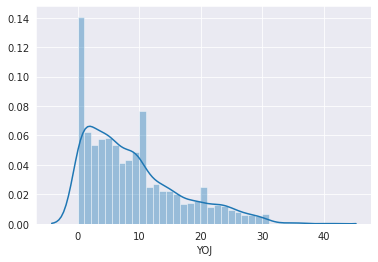

In [192]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(df['YOJ'])

# Modelo Random Forest

Random Forest é um algoritmo de aprendizagem de máquina flexível e fácil de usar que produz excelentes resultados a maioria das vezes, mesmo sem ajuste de hiperparâmetros.
* https://medium.com/machina-sapiens/o-algoritmo-da-floresta-aleat%C3%B3ria-3545f6babdf8

In [131]:
# Definindo as colunas para treinamento
feats = [c for c in df_all.columns if c not in ['BAD']]

In [132]:
#Apresentar as colunas
feats

['LOAN',
 'MORTDUE',
 'VALUE',
 'REASON',
 'JOB',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

In [133]:
# importando a biblioteca para definir teste e treino

from sklearn.model_selection import train_test_split

In [134]:
# Separar os dataframes
train, test = train_test_split(df_all, random_state=42)



In [196]:
#Verificar a quantidade de registros de treino
print("Treino: ", train.shape)
print("Teste: ",test.shape)

Treino:  (2523, 13)
Teste:  (841, 13)


In [136]:
# Instanciando o random forest classifier utilizando 200 árvores
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)

In [137]:
# Treinando o modelo
rf.fit(train[feats], train['BAD'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [138]:
# Gerar as predicoes do modelo com os dados de teste
pred_test = rf.predict(test[feats])

In [142]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Apresentar a acurácia do modelo
print("Accuracy:",metrics.accuracy_score(test['BAD'], pred_test))

accuracy = metrics.accuracy_score(test['BAD'], pred_test)

Accuracy: 0.9548156956004756


In [157]:
# Apresentar a balanced do modelo
balanced = balanced_accuracy_score(test['BAD'],pred_test)
print("Balanced:",balanced)

Balanced: 0.7285714285714285


In [158]:
# Apresentar a F1 score do modelo
score = f1_score(test['BAD'],pred_test)
print("f1 score:",score)

f1 score: 0.6274509803921569


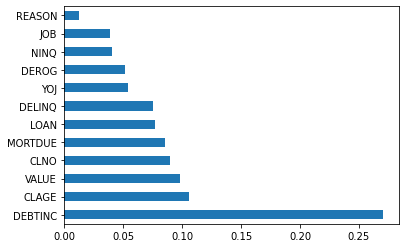

In [163]:
# Apresentar as colunas por importância
(pd.Series(rf.feature_importances_, index=feats)
   .nlargest(13)
   .plot(kind='barh')) 

In [144]:
#Importar as bibliotecas
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import scikitplot as skplt

In [201]:
#Apresentar a matriz de confusão
matriz = confusion_matrix(test['BAD'], pred_test)

matriz

array([[771,   0],
       [ 38,  32]])

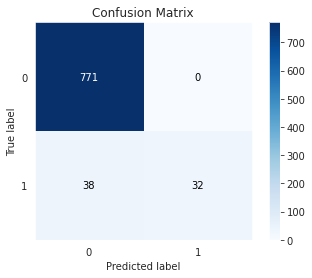

In [202]:
# Apresentar o gráfico da matriz de confusão
skplt.metrics.plot_confusion_matrix(test['BAD'], pred_test)

# Conclusão

O dataset analisado tem 13 atributos e 3364 registros. 
Para a avaliação dos modelos, o dataset foi divido aleatoriamente em um conjunto para treinamento e um conjunto para teste. 
Foi criado 0 classificador floresta de árvores de decisão gerada pelo algoritmo Random Forest. 
A acurácia obtida foi de 95.4%.